# Chap 16 - Ex2: apply PCA for nndb_flat.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

In [3]:
nndb = pd.read_csv('Data/nndb_flat.csv')
nndb

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [5]:
nndb = nndb.select_dtypes(include='float64')
nndb

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


Number of numerical fields: 38

All numerical fields: Index(['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg', 'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA', 'Zinc_USRDA'], dtype='object')



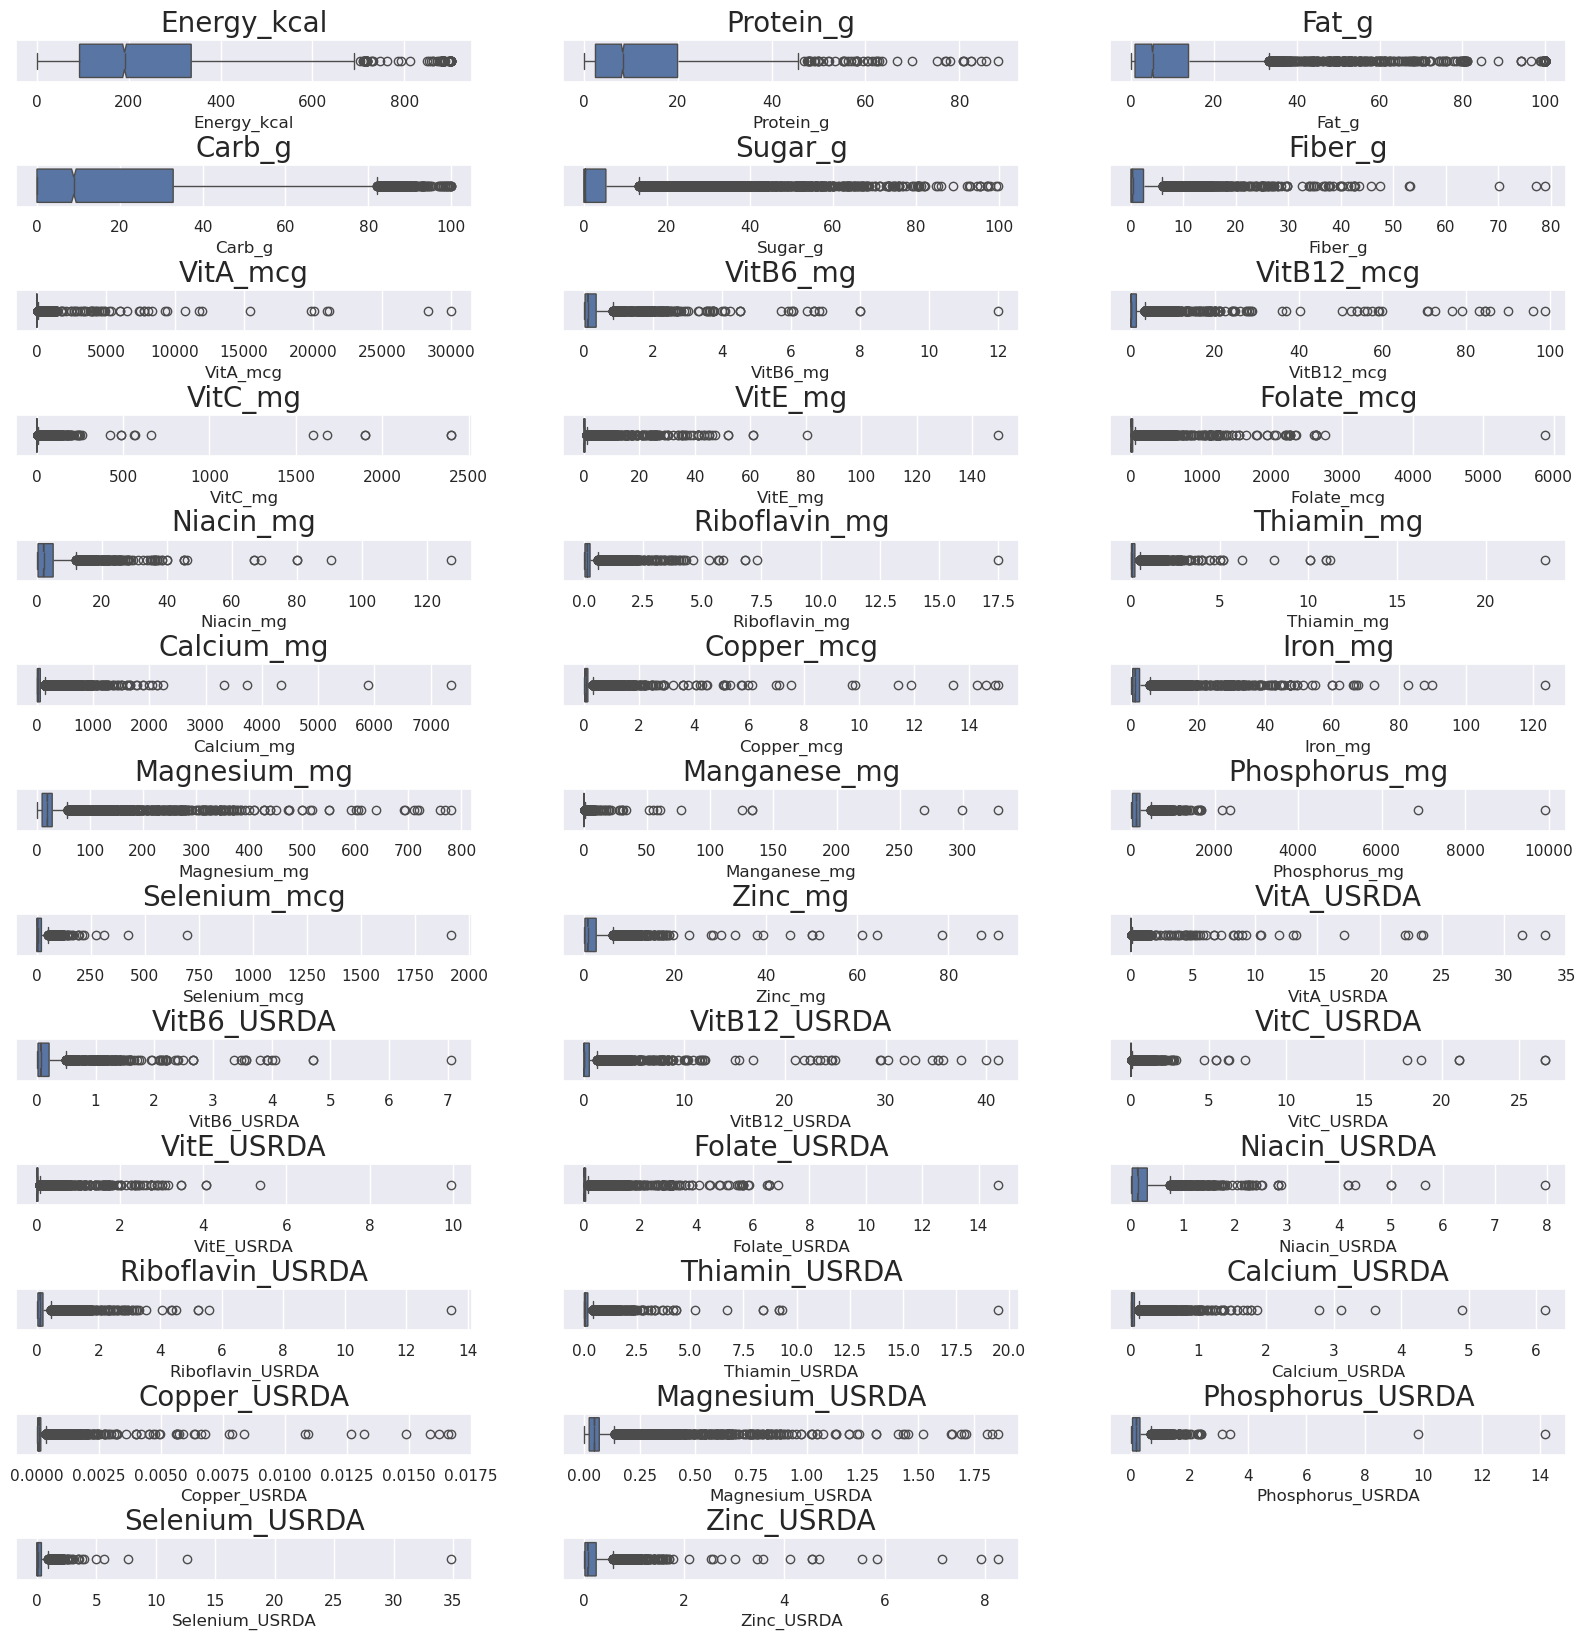

In [13]:
## Visualize numerical variables

sbn.set_theme(style='darkgrid')

numeric_cols = nndb.columns

col = 3
row = (len(numeric_cols)//col) if ( (len(numeric_cols)%col) == 0) else ((len(numeric_cols)//col) + 1)

print(f'Number of numerical fields: {len(numeric_cols)}\n')
print(f'All numerical fields: {numeric_cols}\n')

plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0.2, hspace=2)
for i in range(1, len(numeric_cols)+1):
    try:
        plt.subplot(row, col, i)
        sbn.boxplot(data = nndb, x = numeric_cols[i-1], notch = True)
        plt.title(numeric_cols[i-1], size = 20)
    except Exception:
        print('Error {}'.format(numeric_cols[i-1]))
        break
plt.show()

## <span style = 'color:yellow'> Right skewness => Apply LogScaler then MinMaxScaler

Number of numerical fields: 38

All numerical fields: Index(['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg', 'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA', 'Zinc_USRDA'], dtype='object')



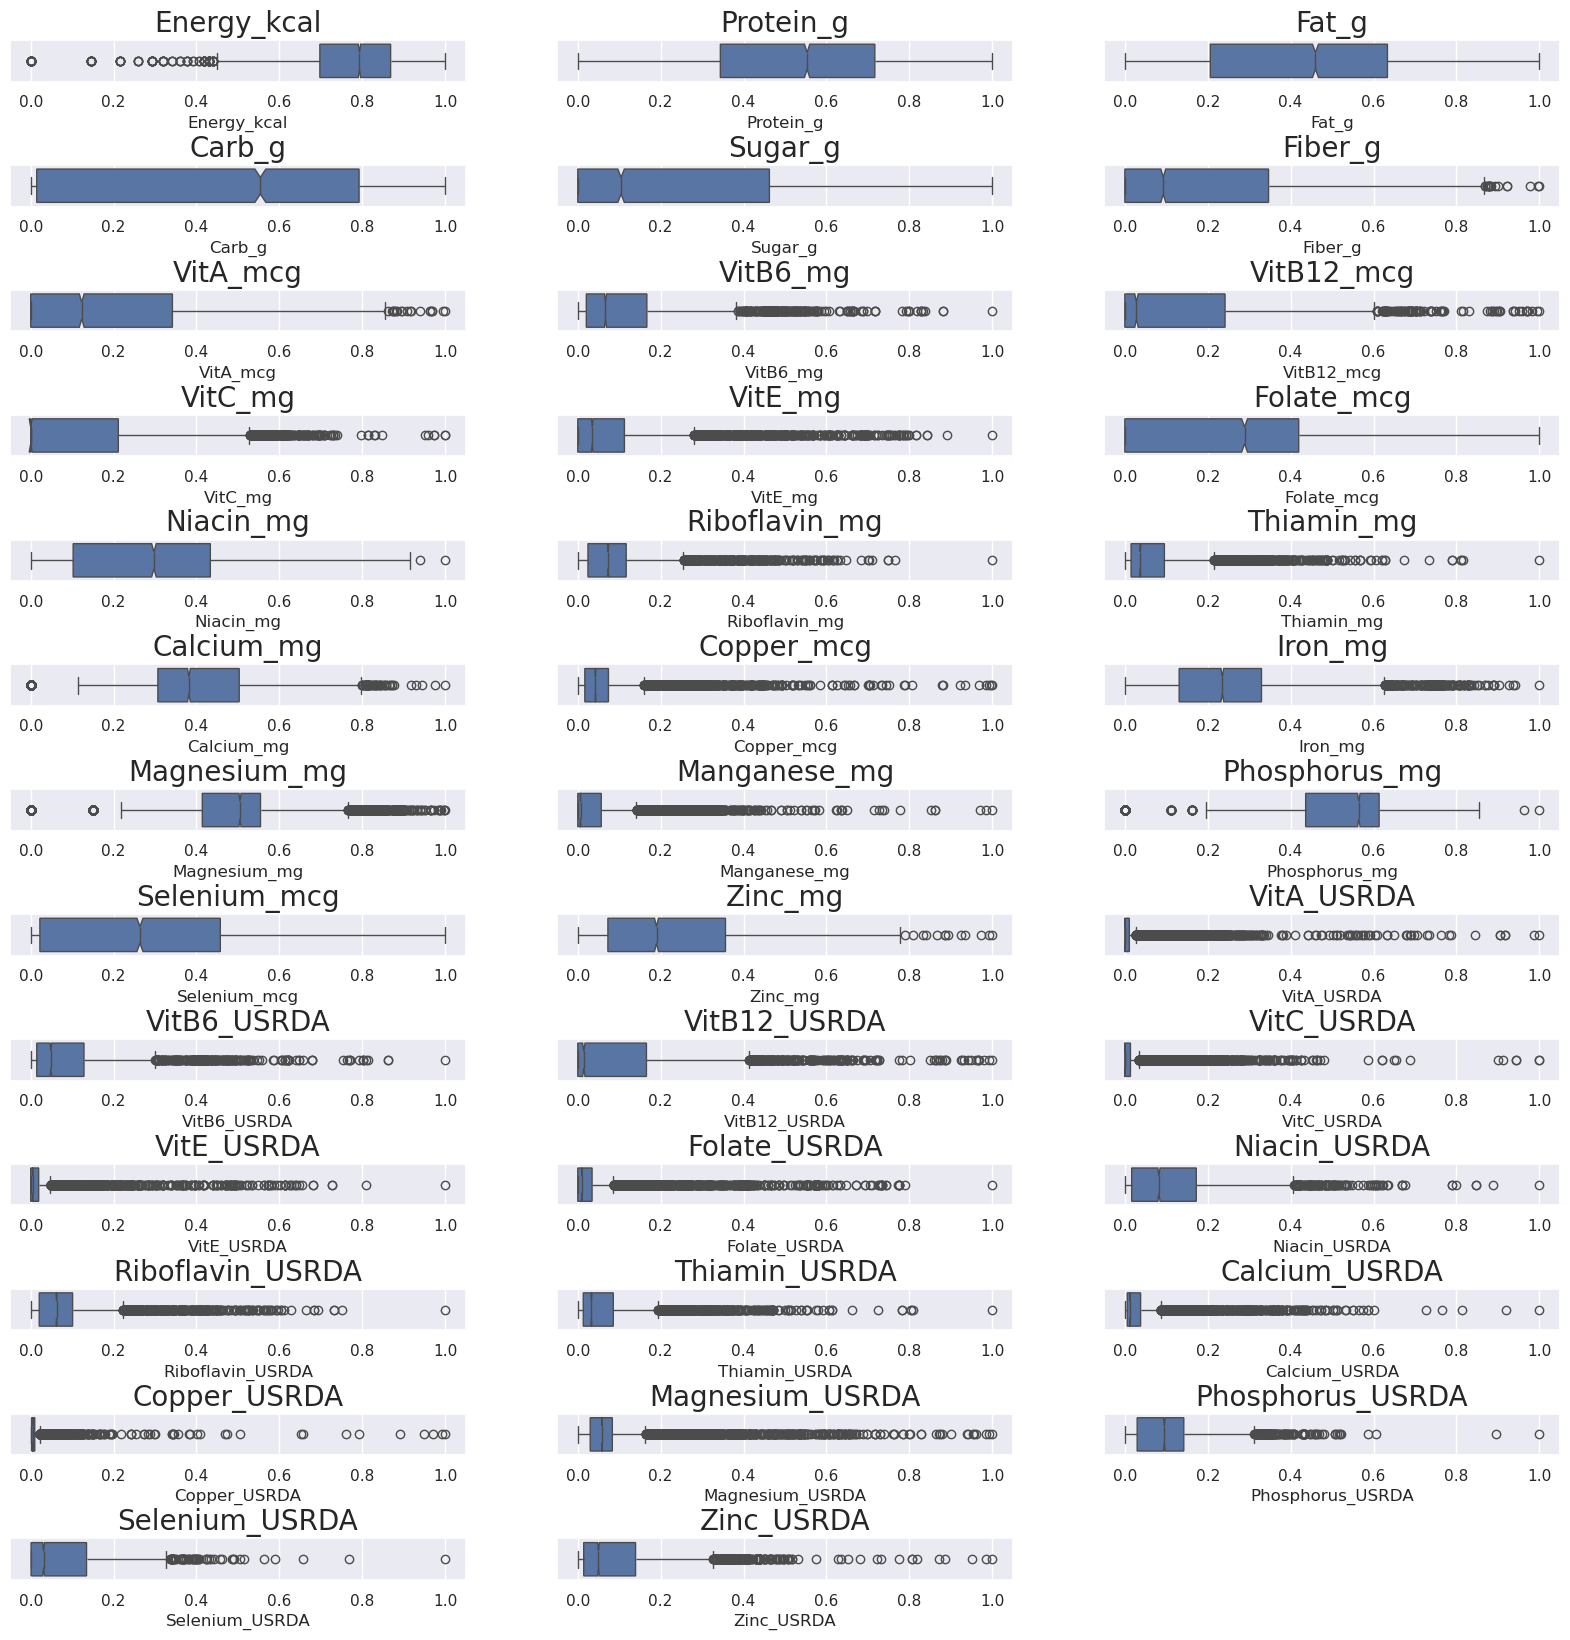

In [14]:
from sklearn.preprocessing import MinMaxScaler

nndb_scaled = pd.DataFrame(MinMaxScaler().fit_transform(nndb.apply(lambda x: np.log(x+0.5))),
                          columns = nndb.columns)

numeric_cols = nndb.columns

col = 3
row = (len(numeric_cols)//col) if ( (len(numeric_cols)%col) == 0) else ((len(numeric_cols)//col) + 1)

print(f'Number of numerical fields: {len(numeric_cols)}\n')
print(f'All numerical fields: {numeric_cols}\n')

plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0.2, hspace=2)
for i in range(1, len(numeric_cols)+1):
    try:
        plt.subplot(row, col, i)
        sbn.boxplot(data = nndb_scaled, x = numeric_cols[i-1], notch = True)
        plt.title(numeric_cols[i-1], size = 20)
    except Exception:
        print('Error {}'.format(numeric_cols[i-1]))
        break
plt.show()

## <span style = 'color:yellow'> Apply PCA for nnbd data with LogScaler and MinMaxScaler

In [18]:
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline

numeric_cols = nndb.columns

LogScaler = ColumnTransformer(
    [('LogTransformer', FunctionTransformer(func = lambda x: np.log(x+0.5), inverse_func = lambda x: np.exp(x)-0.5, validate = True), numeric_cols)],
    remainder = 'passthrough'
)

pca_pipe = Pipeline([
    ('LogScaler', LogScaler),
    ('MinMaxScaler', MinMaxScaler()),
    ('PCA', PCA(0.9))
])

pca_pipe.fit(nndb)

Pipeline(steps=[('LogScaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('LogTransformer',
                                                  FunctionTransformer(func=<function <lambda> at 0x7aaea0b047c0>,
                                                                      inverse_func=<function <lambda> at 0x7aaea0b054e0>,
                                                                      validate=True),
                                                  Index(['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg'...horus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA', 'Zinc_USRDA'], dtype='object'))])),
                ('MinMaxScaler', MinMaxScaler()),
                ('PCA', PCA(n_components=0.9))])

In [22]:
nndb_pca = pd.DataFrame(
    pca_pipe.transform(nndb),
    columns = [f'PC{i+1}' for i in range(pca_pipe.named_steps['PCA'].n_components_)]
)

nndb_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.044676,-0.593769,0.201698,0.433381,0.761427,-0.332213,0.001666,-0.012183,-0.094791,-0.109270,-0.000610,-0.071058
1,0.047292,-0.585923,0.203356,0.427287,0.758967,-0.342171,-0.002858,-0.010641,-0.093589,-0.112521,0.009097,-0.077280
2,0.248692,-0.814325,0.350213,0.536657,0.680020,-0.533282,-0.061215,0.001929,-0.152973,-0.162874,-0.022057,-0.048468
3,-0.495407,0.040074,0.006789,0.202823,0.546766,0.169737,-0.084835,0.089412,0.203559,-0.033487,0.056147,-0.037167
4,-0.439955,0.025420,0.026686,0.204582,0.636294,0.225428,-0.149662,0.063524,0.274379,-0.071109,-0.000898,-0.029871
...,...,...,...,...,...,...,...,...,...,...,...,...
8613,-0.906650,-0.186023,-0.058315,0.323610,0.270443,0.036719,0.087887,-0.017291,0.055895,-0.153499,-0.153855,0.151514
8614,-0.304894,-0.151793,-0.238858,-0.213462,0.015706,0.291754,0.061356,0.186216,0.049636,0.017964,-0.222365,0.024094
8615,0.971696,0.108187,0.163111,0.163247,-0.340824,0.420754,0.072670,0.057413,0.000465,0.000278,-0.186790,0.105619
8616,-0.396235,-0.035169,-0.273969,-0.165800,0.255579,0.116614,0.025265,-0.175422,-0.294575,-0.150433,-0.207050,0.168908


In [23]:
print('Explained Variance Raito:\n',pca_pipe.named_steps['PCA'].explained_variance_ratio_)

Explained Variance Raito:
 [0.3057739  0.23094461 0.09012419 0.06288192 0.05149658 0.03652959
 0.02903326 0.02683675 0.02210722 0.01891164 0.01693933 0.01543157]


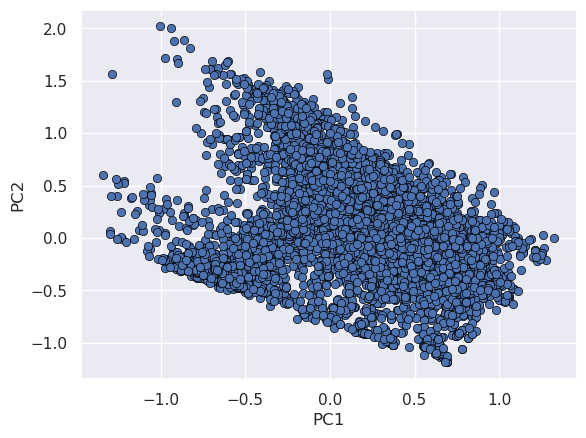

In [27]:
sbn.scatterplot(data = nndb_pca, x = 'PC1', y = 'PC2', edgecolors = 'black')
plt.show()

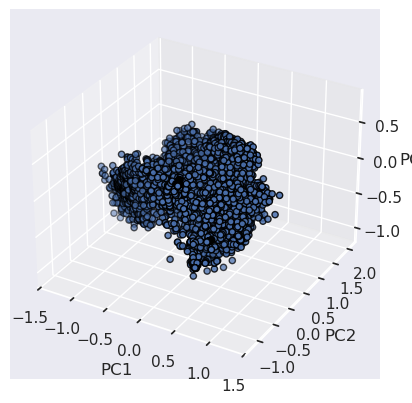

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(xs = nndb_pca['PC1'], ys = nndb_pca['PC2'], zs = nndb_pca['PC3'], edgecolors='black')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()